# Mixed effect models I

Linear **mixed** models contain two variable types:
- Fixed effects
- Random effects
    - Effects for which we care more about the variance than the mean
    - Can account for non-independent observations (*pseudoreplication*)

# Variance component analysis using random-effect models

Random effect models let us analyze variance residing at multiple levels. Example:

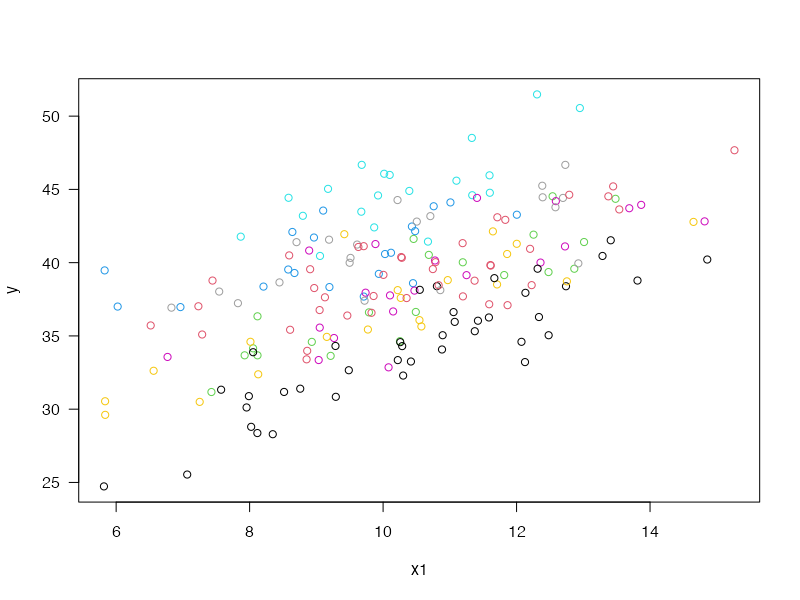

In [1]:
set.seed(145)
x1 = rnorm(200, 10, 2)

groupmeans = rep(rnorm(10, 20, 4), each=20)
groupID = as.factor(rep(paste0("Group", 1:10), each=20))

y = 2 + 1.5*x1 + groupmeans + rnorm(200, 0, 2)

plot(x1, y, col=as.numeric(groupID), las=1)

In the above data, there is an overall trend between $x1$ and $y$, and there appear to be differences between groups.

To do a **variance component analysis**, we specify a **random-effect model** using `glmmTMB` with the `(1|Pop)` format, where `1` defines that we vary intercepts but keep slopes concept. In other words, we are getting a different linear function for each level, and forcing the slopes to be the same.

In [3]:
library(glmmTMB)

data = data.frame(y, x1, groupID)
head(data)

Warning message:
In check_dep_version(dep_pkg = "TMB") : package version mismatch: 
glmmTMB was built with TMB package version 1.9.17
Current TMB package version is 1.9.18
Please re-install glmmTMB from source or restore original ‘TMB’ package (see '?reinstalling' for more information)


         y       x1 groupID
1 35.32047 11.37383  Group1
2 37.94114 12.13273  Group1
3 35.95843 11.07340  Group1
4 38.77994 13.81206  Group1
5 33.21379 12.12632  Group1
6 38.38936 12.74069  Group1